# PRÉPAREZ DES DONNÉES POUR UN ORGANISME DE SANTÉ PUBLIQUE

![](Logo-Sante-Publique-France-.png)

# Table des matières

# Introduction

L'agence "Santé publique France" a lancé un **appel à projets pour rendre les données de santé plus accessibles**. L’agence souhaite faire explorer et visualiser des données, pour que ses agents puissent les exploiter.

Le jeu de données à analyser est issu de la plateforme **Open Food Facts**, qui est une association donnant accès à une base données de produits alimentaires :
- ouverte à tous
- où tout le monde peut contribuer

Dans le cadre de cet appel à projets, nous :
- proposerons une idée d'application
- mènerons à bien le nettoyage nécessaire à l'exploration des données
- explorerons les données traitées

# Partie 1 - Imports & Proposition d'application

## P1.1. Imports des librairies & du dataset

Commençons par importer les principales librairies dont nous aurons besoin :

In [1]:
import pandas as pd # to manipulate the dataset with dataframes
import numpy as np # for statistics and calculations
import matplotlib.pyplot as plt # for data visualisation
%matplotlib inline
import seaborn as sns # for data visualisation, with different proporties
import missingno as ms # for visualisation of missing data

## P1.2. Import du dataset

In [2]:
foodRaw=pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t',low_memory=False)

Nous pouvons regarder les dimensions du tableau généré :

In [3]:
print("Le tableau mis à disposition comporte ", foodRaw.shape[1], "variables et ", foodRaw.shape[0], "lignes / produits")

Le tableau mis à disposition comporte  162 variables et  320772 lignes / produits


Nous pouvons affihcer les premières lignes :

In [4]:
display(foodRaw.head())

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous avons à disposition 4 types de variables :
- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : 
    - quantité en grammes d’un nutriment pour 100 grammes du produit.
    - des scores nutritionnels (comme le nutriscore)

## P1.3. Proposition d'application

Afin d'aider à améliorer la santé de nos concitoyens, nous pourrions utiliser les données mises à notre disposition pour aider les malades et les médecins.

En effet, un des principaux maux du 21$^{ème}$ est la multiplications de maladies chroniques dans nos sociétés industrialisées. Mes maladies cardiovasculaires représentent **la dépense la plus importante** pour l'Assurance Maladie.

**Hypertension, Diabètes, Cholestérol, Obésites, etc.** : Toutes ses pathologies sont, à des degrès différents, liées au régime alimentaire des malades.

En plus des médicaments, les médecins prescrivent également un **régime alimentaire adapté** aux pathologies chroniques des patients affectés.

Mais devant le nombre de produits disponibles en grandes surfaces, chacun avec une étiquette nutritionnelle qui lui est propre, le patient peut se retrouver démuni au moment de faire ses choix.

**MyHealthScore** : Une application **proposée par le médecin** à son patient pour l'aider à adapter son régime alimentaire à sa (ou ses) pathologie(s).

L'idée :
- le médecin configure le **profil** de son patient :
    - données biométriques : sexe, age, poids, taille, etc.
    - pathologie(s) : hypertension, diabètes, cholestérol, obésité, autre
    
    
- le profil permet de créé un score nutritionnel **adapté au patient** : *MyHealthScore*
    - ce score est basé sur les **mêmes données** nutritionnelles que le Nutri-Score :
        - La valeur énergétique (KJ)
        - Les lipides (g)
        - Les acides gras saturés (g)
        - Les sucres (g)
        - Les protéines (g)
        - Le sodium (mg)
        - Les fibres (g)
        - Fruits, légumes, etc. (%)
        
   mais **personnalisé** pour le profil du patient.


- l'**application** pourrait fonctionner ainsi :
    - le patient **scanne / rentre une référence** d'un produit
    - l'application **lui délivre ensuite son MyHeathScore personnalisé** selon les informations renseignées par son médecin.




## P1.4. Sélection des variables

Pour fonctionner, l'application ferait appel à la base de données d'OpenFoodFact pour récupérer les données nutritionnelles et calculer le MyHealthScore du patient.

Il faut pour cela que les données soient présentes. Regardons visuellement le niveau de remplissage du dataset. Pour cela nous allons utiliser la librairie `missingno` :

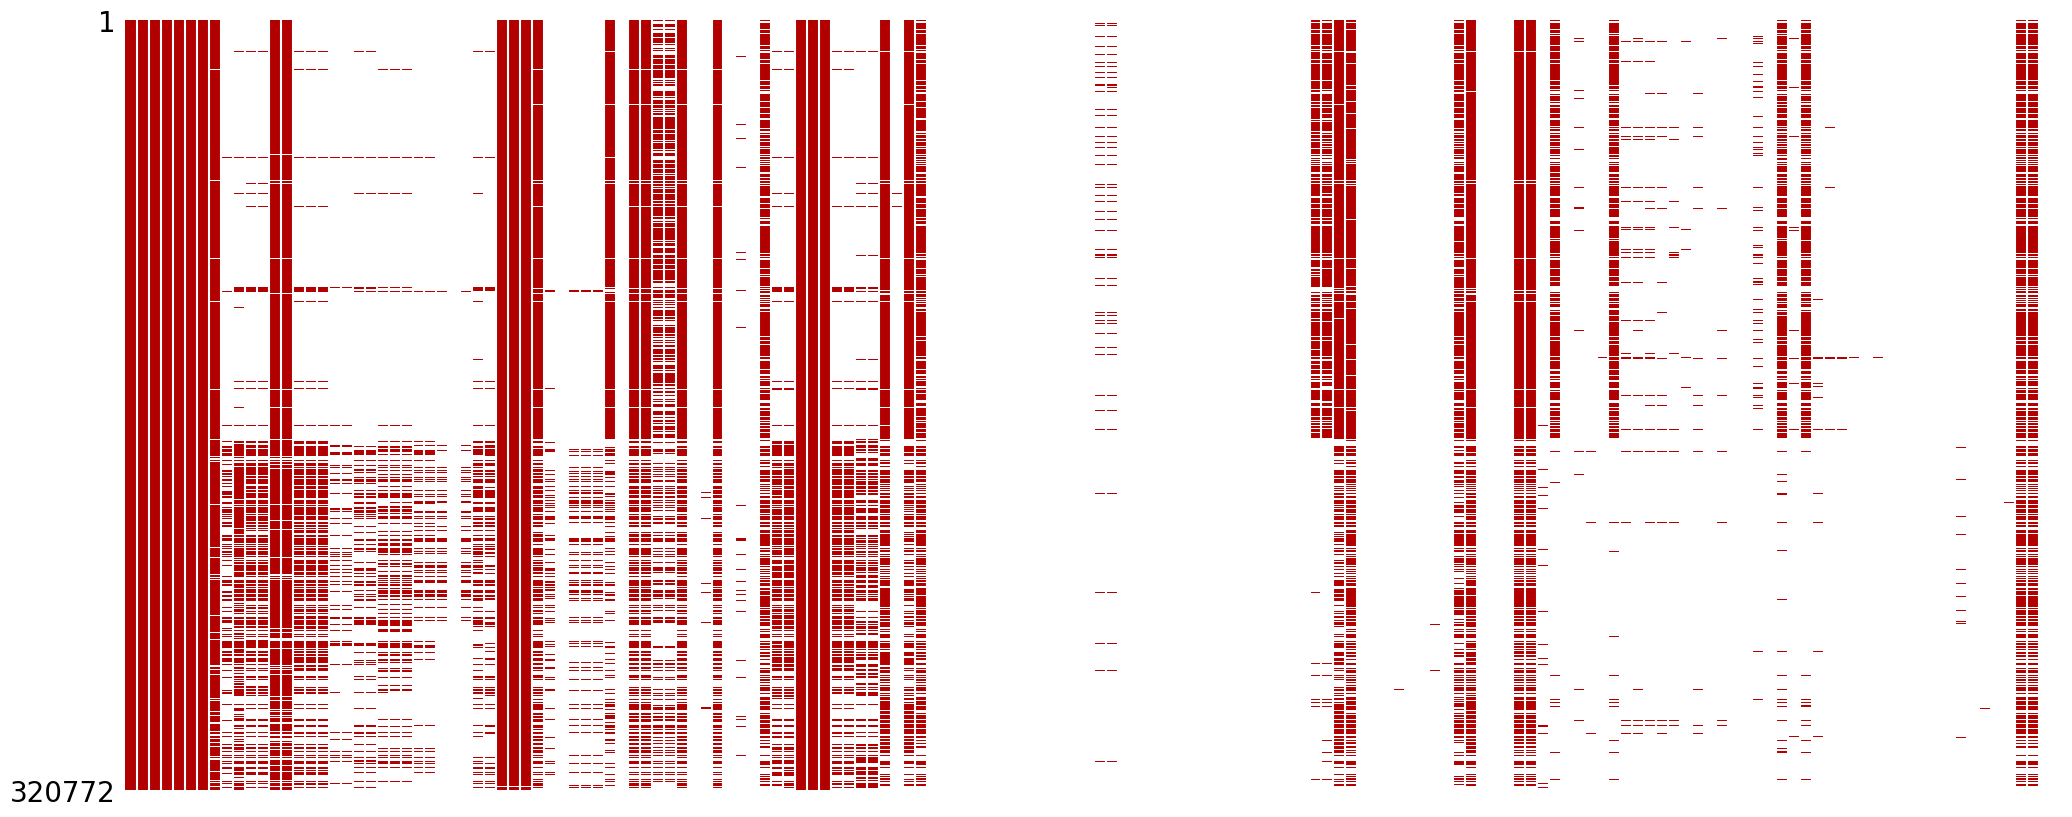

In [5]:
ms.matrix(foodRaw,color=[0.7,0.0,0.0],sparkline=False) # dataviz of missing data
plt.show()

Le data set est globalement **très peu renseigné**.

Nous pouvons regarder ce qu'il en est des features qui nous intéressent pour calculer, théoriquement, un MyHealthScore :

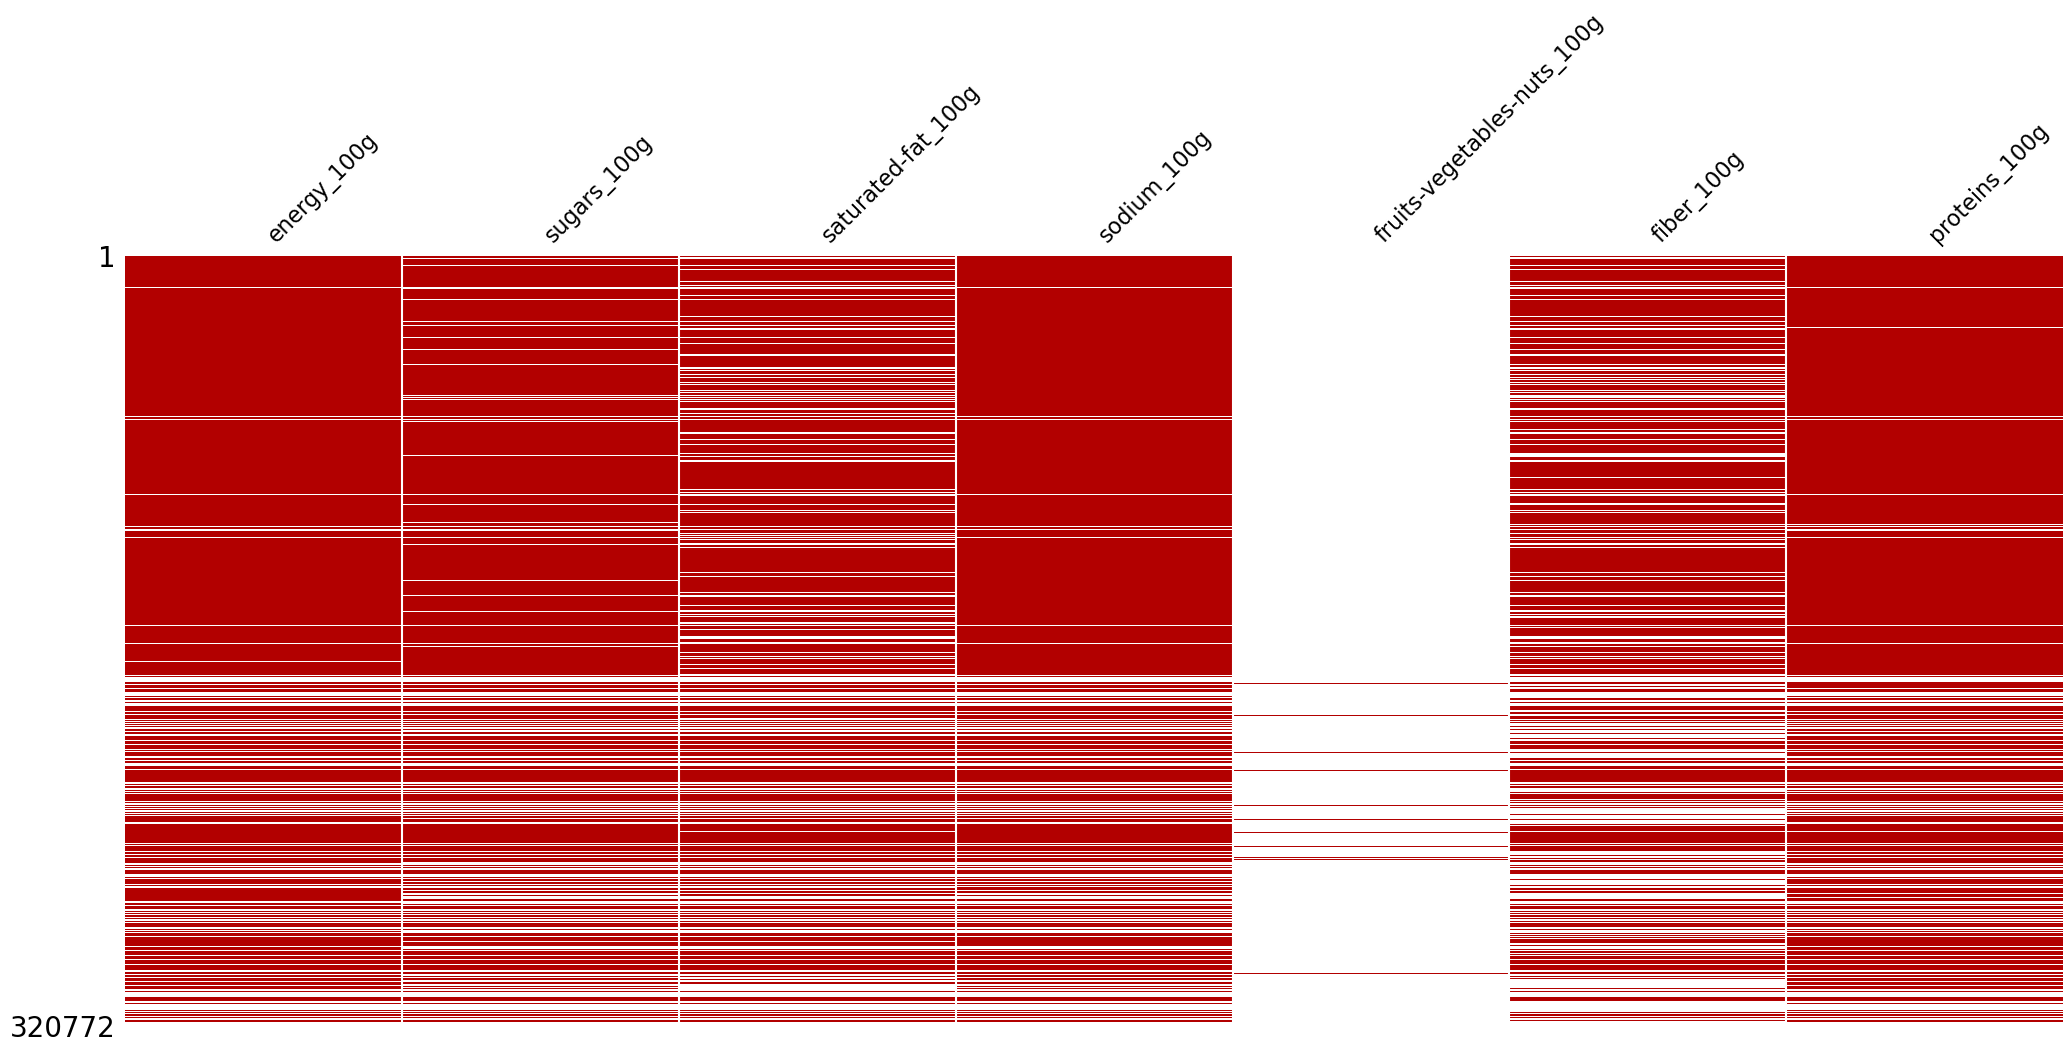

In [6]:
theoricalFeaturesNames=["energy_100g","sugars_100g","saturated-fat_100g","sodium_100g","fruits-vegetables-nuts_100g","fiber_100g","proteins_100g"]
ms.matrix(foodRaw[theoricalFeaturesNames],color=[0.7,0.0,0.0],sparkline=False) # dataviz of missing data
plt.show()

Malheureusement la feature concernant les **fruits et légumes** est **très peu renseignée**...

Or celle-ci se révelle indispensable pour calculer un MyHealthScore reflétant correctement les recommandations médicales.

Par exemple, si l'on regarde les **préconisations hygiéno-ditétiques pour les personnes atteinte d'hypertension**, le site internet de la **sécurité sociale indique** :
- sel : < 6g /j
- perdre du poids, soit via une IMC < 25 kg/m², soit en perdant 10% du poids initial
- activité physique, soit 30 min/j, soit 3x / semaine
- réduire consommation d'alcool
- augmenter la consommation de **fruits et légumes**
- réduire la consommation de graisses saturées
- arrêter le tabac

La construction d'un MyHealthScore devra donc passer par la prise en compte d'autres colonnes. Pour les déterminer, nous pourrons nous baser dans un premier sur le "taux de vide". Regardons ce que cela donne pour les colonnes `theoricalFeaturesNames` :

In [7]:
# percentage of null values in primal selected features :
(foodRaw[theoricalFeaturesNames].isna().mean()*100).round(1).astype(str)+" %"

energy_100g                    18.6 %
sugars_100g                    23.6 %
saturated-fat_100g             28.4 %
sodium_100g                    20.4 %
fruits-vegetables-nuts_100g    99.1 %
fiber_100g                     37.4 %
proteins_100g                  19.0 %
dtype: object

Écrivons une fonction pour filtrer les colonnes en fonction de leur taux de valeurs manquantes :

In [8]:
def dropEmptyCols(df,emptinessThreshold=1) :
    
    """return an input pandas.DataFrame without its empty columns
    
    inputs
    ------
    df : pandas.DataFrame object
    
    optional inputs 
    ---------------
    emptinessThreshold : float, defaul : = 1. Gives the limit threshold of emptiness. 
    if >=threshold, column is dropped. 
    
    returns
    -------
    dfWithoutEmptyCols : pandas.DataFrame object, the same one without its empty columns
    
    """
    #select columns with percentage of null values > threshold
    emptyColsNames=df.isna().mean().loc[df.isna().mean()>=emptinessThreshold].index 
    
    #drop selected columns
    dfWithoutEmptyCols=df.copy()
    dfWithoutEmptyCols = dfWithoutEmptyCols.drop(columns=emptyColsNames)
    
    return dfWithoutEmptyCols

Nous avons d'ores et déjà fait une croix sur `fruits-vegetables-nuts_100g`. Basons-nous sur le taux de `fiber_100g` :

In [9]:
foodWithout_38=dropEmptyCols(foodRaw,emptinessThreshold=0.38)

In [10]:
# check percentage of null values in foodWithout_38
(foodWithout_38.isna().mean().sort_values()*100).round(2).astype(str)+" %"

last_modified_t                              0.0 %
last_modified_datetime                       0.0 %
creator                                      0.0 %
created_t                                    0.0 %
created_datetime                             0.0 %
code                                        0.01 %
url                                         0.01 %
states_tags                                 0.01 %
states                                      0.01 %
states_fr                                   0.01 %
countries_fr                                0.09 %
countries_tags                              0.09 %
countries                                   0.09 %
product_name                                5.54 %
brands                                      8.86 %
brands_tags                                 8.86 %
energy_100g                                 18.6 %
proteins_100g                              18.97 %
salt_100g                                  20.35 %
sodium_100g                    

N'ayant pas à notre disposition la teneur en fruits et légumes, nous pouvons nous baser sur le Nutri-Score, qui prend en compte celle-ci dans son calcul.

A partir du Nutri-Score, il sera possible dans le cadre du développement de l'application, de créer un MyHealthScore en adaptant les pondérations des autres valeurs nutritionnelles.

On peut donc sélectionner les variables suivantes pour notre analyse :
- `code`, `product_name` et `brands` pour identitifer les produits
- `nutrition-score-fr_100g` qui correspond au socre nutritionnel
- `nutrition_grade_fr` qui correspond au Nutri-Score, l'échelle graphique scindant le score nutritionnel en 5 classes A, B, C, D et E
- `energy_100g`
- `proteins_100g`
- `fiber_100g`
- `sodium_100g` et `salt_100g`, qui sont liées et dont l'analyse commune pourrait servir dans le traitement
- `sugars_100g` et `carbohydrates_100g`
- `saturated-fat_100g` et `fat_100g`
- `countries_fr`, qui liste les pays de dans lesquels le produit est commercialisé. Nous souhaitons réaliser l'étude pour la France dans un premier temps. Cette colonne servira essentiellement à filtrer.

In [11]:
# selected work features
workFeatures=theoricalFeaturesNames+["code",
                                     "product_name",
                                     "brands",
                                     "nutrition-score-fr_100g",
                                     "nutrition_grade_fr",
                                     "salt_100g",
                                     "carbohydrates_100g",
                                     "fat_100g",
                                     "countries_fr"]

In [12]:
foodRawLight = foodRaw.copy()
foodRawLight = foodRawLight[workFeatures]
foodRawLight

,energy_100g,sugars_100g,saturated-fat_100g,sodium_100g,fruits-vegetables-nuts_100g,fiber_100g,proteins_100g,code,product_name,brands,nutrition-score-fr_100g,nutrition_grade_fr,salt_100g,carbohydrates_100g,fat_100g,countries_fr
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000003087,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,France
1,2243.0,14.29,28.57,0.000,NaN,3.6,3.57,0000000004530,Banana Chips Sweetened (Whole),NaN,14.0,d,0.00000,64.29,28.57,États-Unis
2,1941.0,17.86,0.00,0.250,NaN,7.1,17.86,0000000004559,Peanuts,Torn & Glasser,0.0,b,0.63500,60.71,17.86,États-Unis
3,2540.0,3.57,5.36,0.482,NaN,7.1,17.86,0000000016087,Organic Salted Nut Mix,Grizzlies,12.0,d,1.22428,17.86,57.14,États-Unis
4,1552.0,NaN,NaN,NaN,NaN,5.7,8.57,0000000016094,Organic Polenta,Bob's Red Mill,NaN,NaN,NaN,77.14,1.43,États-Unis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9948282780603,Tomato & ricotta,Panzani,NaN,NaN,NaN,NaN,NaN,Roumanie
320768,0.0,0.00,0.00,0.000,NaN,0.0,0.00,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,0.0,b,0.00000,0.00,0.00,États-Unis
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9970229501521,乐吧泡菜味薯片,乐吧,NaN,NaN,NaN,NaN,NaN,Chine
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9980282863788,Tomates aux Vermicelles,Knorr,NaN,NaN,NaN,NaN,NaN,France


# Partie 2 - Nettoyage

## P2.1. Centrer l'étude sur la France

Comme expliqué plus haut, nous allons nous concentrer sur le France dans le cadre cette étude.

Cette colonne ne contient pas beaucoup de valeurs manquantes (0.09%). Néanmoins  nous pouvons regarder si les autres colonnes de type "countries" peuvent nous aidons facilement à les combler.

In [13]:
# create a list with "coutries" columns
countriesColNames = [col for col in foodRaw.columns if "countri" in col]

In [14]:
foodRaw[countriesColNames].isna().sum()

countries         280
countries_tags    280
countries_fr      280
dtype: int64

Regardons maintenant s'il existe des produits pour lesquels "countries_fr" est manquante et une des 2 autres est complétée :

In [15]:
maskCountries = (foodRaw.countries_fr.isna())&((foodRaw.countries_tags.notna())|(foodRaw.countries.notna()))

foodRaw[countriesColNames].loc[maskCountries]

,countries,countries_tags,countries_fr


Les autres colonnes ne peuvent donc pas nous aider à combler les 280 valeurs manquantes. Nous ne considérerons pas ces produits.

Regardons maintenant les différents pays contributeurs de la base de données :

In [16]:
# list of unique values in "countries_fr" and number of occurrences
foodRawLight.countries_fr.value_counts(ascending=False)

États-Unis                                      172998
France                                           94392
Suisse                                           14953
Allemagne                                         7870
Espagne                                           5009
                                                 ...  
Danemark,Suisse,en:Deutschland,en:Frankreich         1
France,Luxembourg,Suisse                             1
Autriche,République tchèque,Allemagne                1
Allemagne,Hongrie                                    1
Chine,Hong Kong                                      1
Name: countries_fr, Length: 722, dtype: int64

Les valeurs de cette variables contiennent, en chaîne de caractères, la liste des pays où le produit est commercialisé.

Afin de nous concentrer sur la france, nous allons donc rechercher dans ces chaînes de caractères :

In [17]:
# create masks for french produits 
maskFrance = foodRawLight.countries_fr.str.find("France")!=-1
maskfrance = foodRawLight.countries_fr.str.find("france")!=-1
maskFr = foodRawLight.countries_fr.str.find("Fr")!=-1
maskFR = foodRawLight.countries_fr.str.find("FR")!=-1
maskfr = foodRawLight.countries_fr.str.find("fr")!=-1

Testons ces différents filtres.

In [18]:
foodRawLight.loc[maskFrance,"countries_fr"].value_counts()

France                                                   94392
France,Suisse                                             1224
France,Royaume-Uni                                         514
Belgique,France                                            512
France,Allemagne                                           240
                                                         ...  
Belgique,France,Allemagne,Roumanie                           1
Australie,République tchèque,France,Allemagne,Hongrie        1
Danemark,France,Allemagne,Russie,Espagne,Royaume-Uni         1
République tchèque,Danemark,France,Allemagne                 1
France,Hong Kong                                             1
Name: countries_fr, Length: 305, dtype: int64

On obtient 305 valeurs uniques en recherchant avec "France". Continuons :

In [19]:
foodRawLight.loc[maskfrance,"countries_fr"].value_counts()

Series([], Name: countries_fr, dtype: int64)

Cette orthographe n'est pas utilisée. Continuons :

In [20]:
foodRawLight.loc[maskFr&~maskFrance,"countries_fr"].value_counts()

Suisse,Deutschland,Frankreich                                                                                                9
Suisse,Frankrijk,Nederland                                                                                                   2
Danemark,Suisse,es:Franciaorszag,es:Magyarorszag,es:Nagy-britannia,es:Portugalia,es:Spanyolorszag                            1
Belgique,Danemark,Suisse,es:Franciaorszag,es:Magyarorszag,es:Nagy-britannia,es:Nemetorszag,es:Portugalia,es:Spanyolorszag    1
Suisse,Deutschland,Frankreich,Spanien                                                                                        1
Suisse,Frankrijk                                                                                                             1
Suisse,Belgien,Deutschland,Frankreich                                                                                        1
Danemark,Suisse,en:Deutschland,en:Frankreich                                                                   

France est orthographié différemment.

In [21]:
foodRawLight.loc[maskfr&~maskFrance,"countries_fr"].value_counts()

Polynésie française               52
Afrique du Sud                    36
en:fruit-yogurts                   8
Polynésie française,États-Unis     3
Polynésie française,Suisse         1
République centrafricaine          1
Name: countries_fr, dtype: int64

In [22]:
# create a mask for "Polynésie française"
maskPolyFr = foodRawLight.countries_fr.str.find("Polynésie française")!=-1

In [23]:
foodRawLight.loc[maskFR,"countries_fr"].value_counts()

Series([], Name: countries_fr, dtype: int64)

Ce dernier mask n'a rien donné. Nous pouvons donc filtrer notre dataframe pour ne conserver que les produits commercialisés en France : 

In [24]:
foodRawLightFr = foodRawLight.copy()
#apply selected masks
foodRawLightFr = foodRawLightFr.loc[maskFrance|maskFr|maskPolyFr]

Voici les nouvelles dimensions du dataframe de travail :

In [25]:
foodRawLightFr.shape

(98800, 16)

Nous pouvons afficher de nouveau la même visualisation que précédemment, cette fois sur notre dataframe réduit :

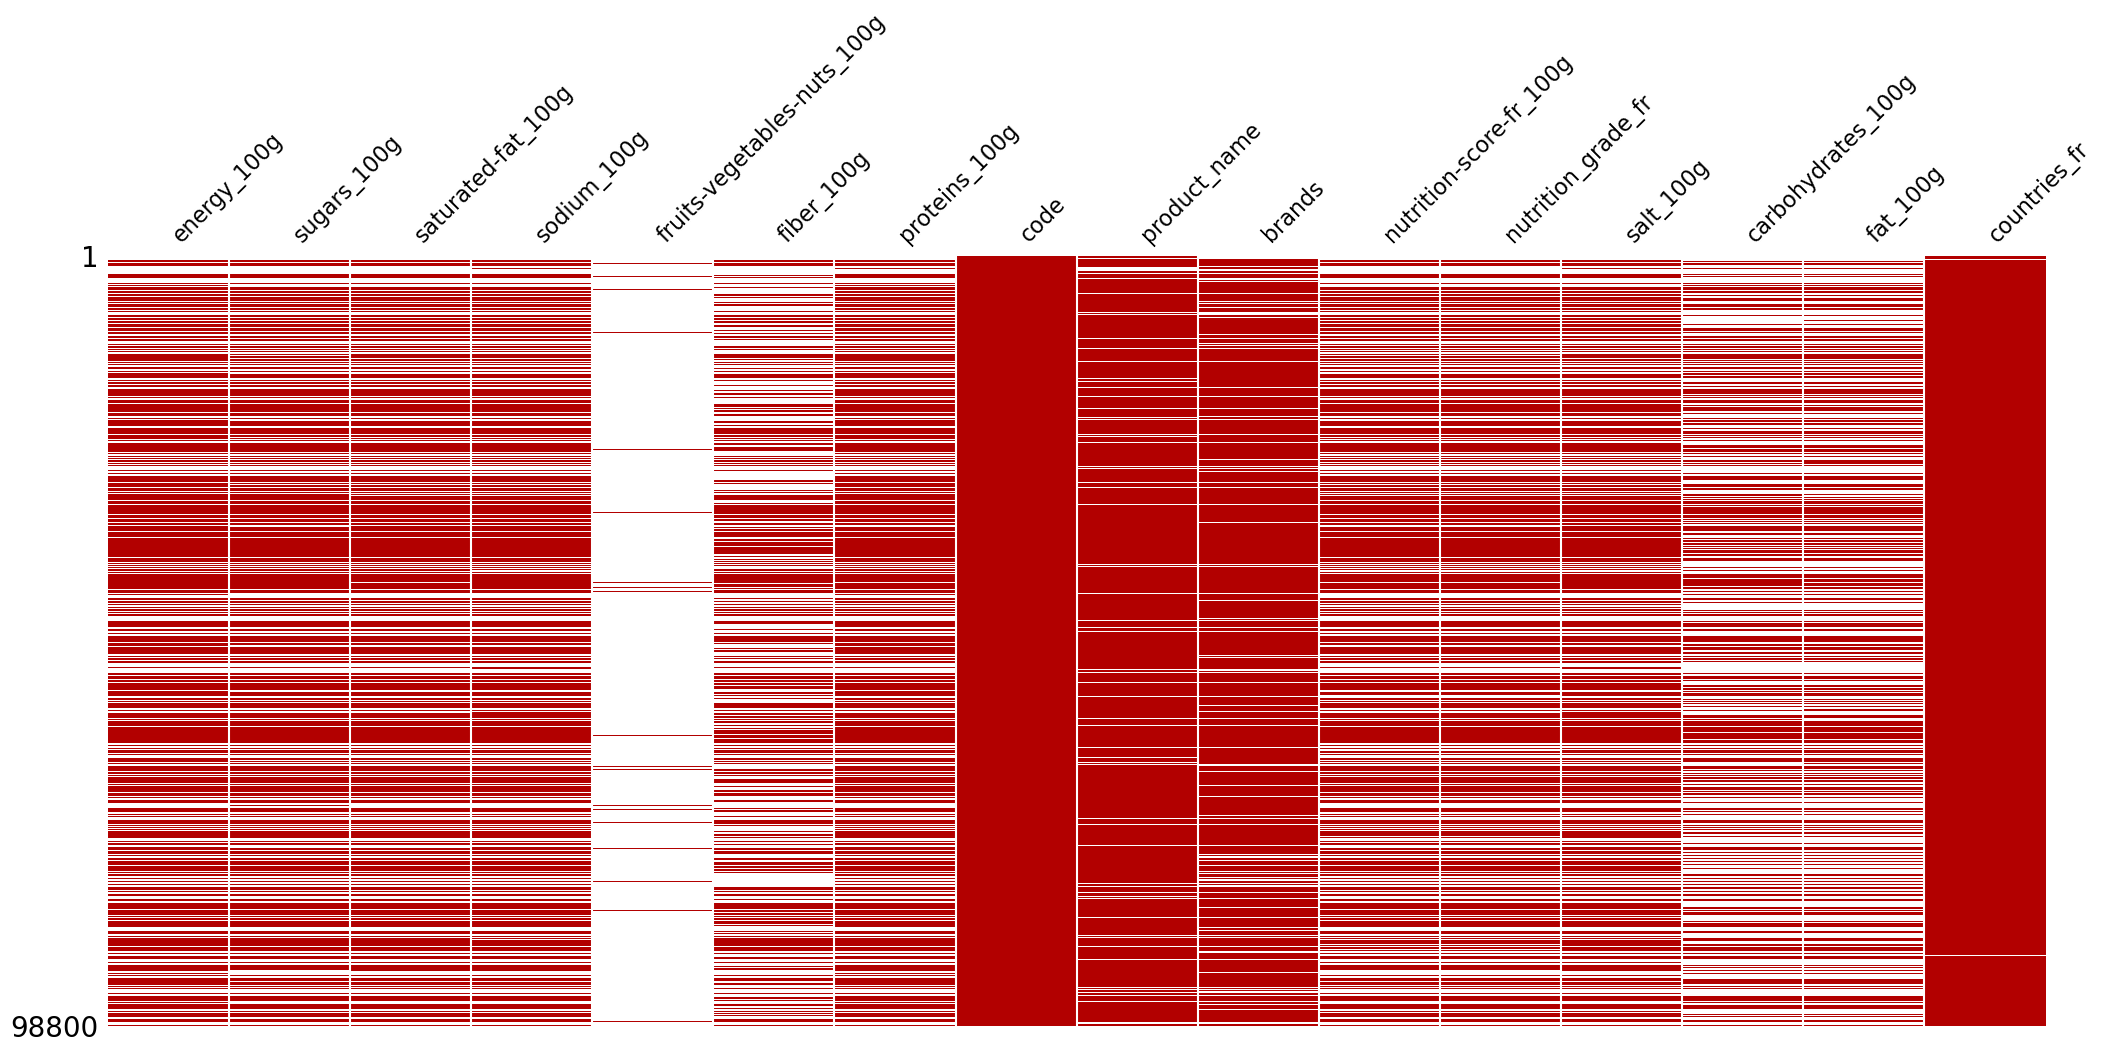

In [26]:
ms.matrix(foodRawLightFr,color=[0.7,0.0,0.0],sparkline=False) # dataviz of missing data
plt.show()

## P2.2. Éliminer les doublons

Pour repérer les produit présents deux fois, nous pouvons dans un premier temps regarder la colonne "code".

### P2.2.1. Des produits en double ? "code"

In [27]:
foodRawLightFr.code.sample(5)

215122    3263850621116
175196    1765321130483
195468    3154230082927
208614    3254560010321
189837    3036811362256
Name: code, dtype: object

le format du code à l'air d'être une suite de 13 chiffres.
Cependant le type "object" de la Series interroge.

In [28]:
# looking to the lenght of "code" values for formatting issues
foodRawLightFr.code.str.len().value_counts(dropna=False).sort_index()

1         2
2         1
3         2
4         6
5        10
6        32
7        38
8      6186
9         6
10       33
11       30
12       36
13    92329
14       51
15       23
16        3
17        1
22        1
24        4
25        1
31        1
32        2
40        1
41        1
Name: code, dtype: int64

Après quelques recherches, les deux formats les plus représentés correspondent aux systèmes EAN 8 et EAN 13 (EAN pour *European Article Numbering*). Ces deux systèmes sont les plus utilisés en Europe.

Nous faisons le choix de nous séparer des 285 produits aux codes barres non formatés EAN 8 ou 13 : l'usage final du MyHealthScore se fera via le scan de code barre.

In [29]:
foodClean01=foodRawLightFr.copy()
# keep only the values of "code" whose length is 8 or 13
foodClean01=foodClean01.loc[(foodClean01.code.str.len()==8)|(foodClean01.code.str.len()==13)]

Nous pouvons maintenant regarder s'il y a des produits en double :

In [51]:
#look for duplicates in column "code"
foodClean01.loc[foodClean01.code.duplicated(keep=False)]

,energy_100g,sugars_100g,saturated-fat_100g,sodium_100g,fruits-vegetables-nuts_100g,fiber_100g,proteins_100g,code,product_name,brands,nutrition-score-fr_100g,nutrition_grade_fr,salt_100g,carbohydrates_100g,fat_100g,countries_fr


Il ne semble pas y avoir de produits différents utilisant le même code-barre.

Une autre manière de repérer les doublons et de regarder la colonne "product_name".

### P2.2.2. Des produits en double ? "product_name" 

Nous n'avons que des produits aux codes barres différents. Mais le même produit a pu être étiqueté avec 2 codes barres différents. Regardons.

In [50]:
foodClean01.product_name.value_counts()

Huile d'olive vierge extra        62
Mayonnaise                        54
Moutarde de Dijon                 49
Orange                            46
Spaghetti                         46
                                  ..
3 Œufs avec surprise               1
20 saucisses de Strasbourg         1
Gelée extra Mûre                   1
noir Eclats de fèves 72% cacao     1
Tomates aux Vermicelles            1
Name: product_name, Length: 74413, dtype: int64

Nous ne sommes pas assez précis. Nous ne pouvons pas considérer seulement "product_name" pour rechercher les doublons. Regardons également "brands".

### P2.2.3. Des produits en double ? "product_name" ET "brands"

Regardons si des noms de produits sont présents plusieurs fois sous la même marque :

In [77]:
foodClean01[["product_name","brands",'code']].groupby(['product_name',"brands"]).count().sort_values("code",ascending=False)

,,code
product_name,brands,
Coca-Cola,Coca-Cola,20
Pom'potes,Materne,15
Nutella,"Ferrero,Nutella",14
Orangina,Orangina,14
Nesquik,"Nestlé,Nesquik",11
...,...,...
Flan Pâtissier,L'instint Bio,1
Flan Pur Beurre,Créa Frais,1
Flan Patissier aux Oeufs,"Alsa,Unilever",1


In [ ]:
foodClean01.loc[(foodClean01[["product_name","brands"]].duplicated(keep=False))]

In [49]:
testdf.loc[(testdf.brands.notna())&(testdf.product_name.notna())&(testdf.product_name.duplicated(keep=False))&(testdf.brands.duplicated(keep=False))].sort_values("brands").sort_values("product_name")

,energy_100g,sugars_100g,saturated-fat_100g,sodium_100g,fruits-vegetables-nuts_100g,fiber_100g,proteins_100g,code,product_name,brands,nutrition-score-fr_100g,nutrition_grade_fr,salt_100g,carbohydrates_100g,fat_100g,countries_fr
625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00052337,,M&S,NaN,NaN,NaN,NaN,NaN,"France,Royaume-Uni"
184100,656.0,0.0,4.8,0.078700,NaN,NaN,19.0,2494593017787,1 Onglet,Charal,0.0,b,0.199898,0.0,9.0,France
184101,641.0,0.0,3.9,0.074803,NaN,NaN,19.0,2494593019613,1 Onglet,Charal,-1.0,a,0.190000,0.0,8.6,France
236232,1029.0,2.5,10.0,0.452756,NaN,NaN,14.0,3512690000194,10 Burgers,Isla Délice,17.0,d,1.150000,3.0,20.0,France
208976,1778.0,9.3,16.0,0.425197,NaN,NaN,7.0,3254560695795,10 Croissants,"Auchan,L'oiseau",21.0,e,1.080000,48.5,22.0,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3350030202842,Œufs frais de poules élevées en plein air,monoprix,NaN,NaN,NaN,NaN,NaN,France
222515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3282070000914,Œufs plein air,Matines,NaN,NaN,NaN,NaN,NaN,France
216212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3263856412312,Œufs plein air,franprix,NaN,NaN,NaN,NaN,NaN,France
196863,2213.0,51.0,17.0,0.051181,NaN,NaN,6.6,3173286681526,œuf en chocolat,Cémoi,26.0,e,0.130000,55.0,31.0,France


# Partie 3 - Exploration

# Tests 

In [31]:
testNutri=foodWithout_38[["nutrition_grade_fr","nutrition-score-fr_100g"]]
testNutri=testNutri.loc[(testNutri["nutrition_grade_fr"].notna())&(testNutri["nutrition-score-fr_100g"].notna())]
testNutri=testNutri.sort_values("nutrition_grade_fr")

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='nutrition-score-fr_100g'>

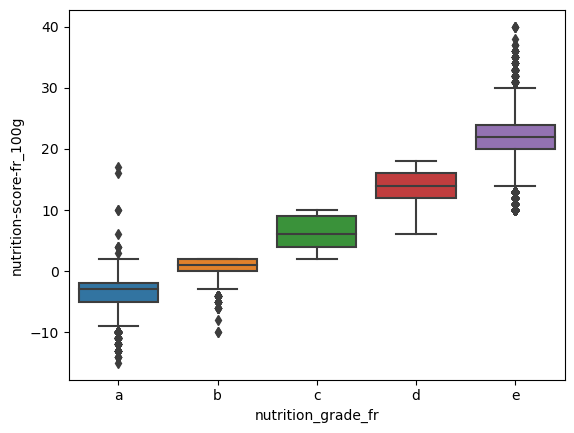

In [32]:
sns.boxplot(data=testNutri,x="nutrition_grade_fr",y="nutrition-score-fr_100g")

In [33]:
testEnerNut=foodWithout_38[["nutrition_grade_fr","energy_100g"]]

In [34]:
testEnerNut=testEnerNut.loc[(testEnerNut["nutrition_grade_fr"].notna())&(testEnerNut["energy_100g"].notna())]
testEnerNut=testEnerNut.loc[testEnerNut["energy_100g"]<3700]
testEnerNut=testEnerNut.sort_values("nutrition_grade_fr")

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='energy_100g'>

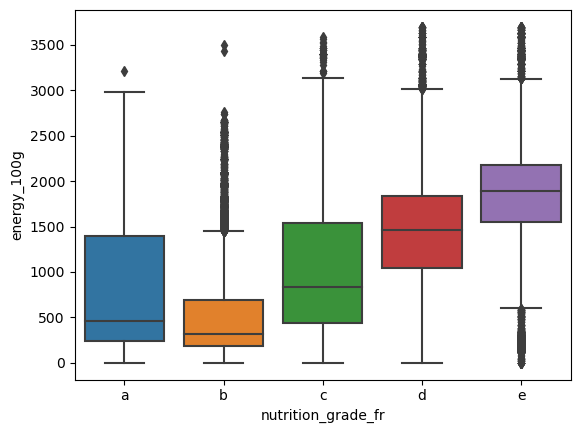

In [35]:
sns.boxplot(data=testEnerNut,x="nutrition_grade_fr",y="energy_100g")

In [36]:
foodRaw.pnns_groups_2.value_counts()

unknown                             22624
One-dish meals                       5546
Sweets                               4698
Biscuits and cakes                   4561
Non-sugared beverages                4302
Cereals                              4106
Cheese                               4024
Dressings and sauces                 3602
Milk and yogurt                      3297
Processed meat                       3247
Chocolate products                   3109
Alcoholic beverages                  2909
Vegetables                           2840
Fish and seafood                     2638
Sweetened beverages                  2170
Appetizers                           2101
Fruits                               2068
Fruit juices                         1924
Bread                                1838
Meat                                 1694
Fats                                 1614
Breakfast cereals                    1408
vegetables                            934
Legumes                           